### What is feature engineering?

 Feature Engineering: Using intiution to self-design NEW features, by        \*transforming\* or \*combining\* original features.
 
Suppose youre given the lenght and breadth of that plot

so instead of     $w_1*frontage+w_2*depth+b$ <br>
we can   $w_1*frontage+w_2*depth+w_3*area+b$ for a better outcome.

### Polynomial Features

Lets see what linear regression does in this scenario wx+b vs y

w,b found by gradient descent: w: [0.00798267], b: 0.00
(array([0.00798267]), 0.004491769641284458) ll
w,b found by gradient descent: w: [18.69806954], b: -52.08


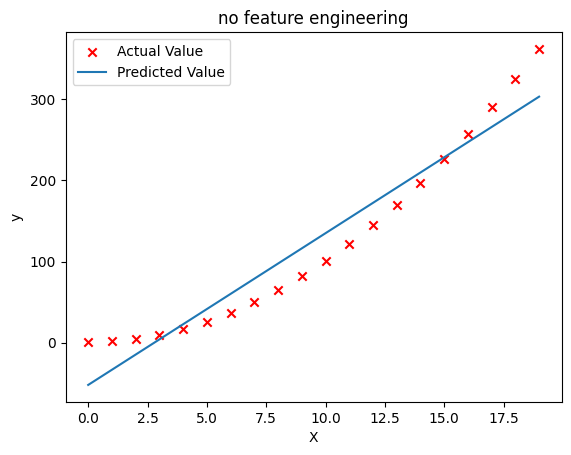

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/kush/Desktop/Supervised Learning/lab_utils')
from lab_utils_multi import zscore_normalize_features, run_gradient_descent

# create target data
x = np.arange(0, 20, 1) #it like [0 1 2 .. 19]
y = 1 + x**2 #*just for data*

X = x.reshape(-1, 1) # but we wanted this. [[0] [1] [2] .. [19]]
model_w,model_b = run_gradient_descent(X,y,iterations=1000, alpha = 1e-2)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,x*model_w + model_b, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()

Not great. Lets try $wx^2+b$ vs y

w,b found by gradient descent: w: [1.00417494], b: 0.05


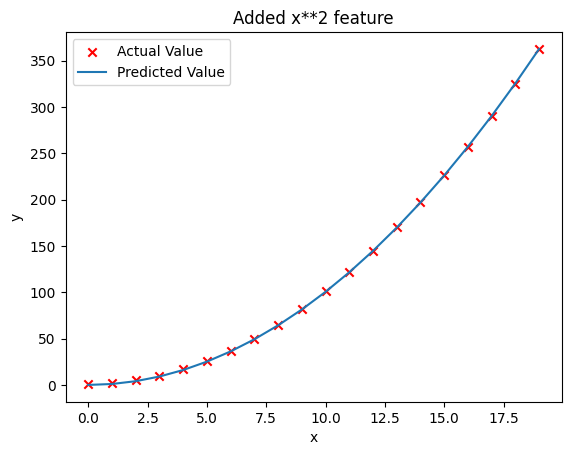

In [2]:

# Engineer features
X = x**2      #<-- added engineered feature
X = X.reshape(-1, 1)  #X should be a 2-D Matrix

model_w,model_b = run_gradient_descent(X, y, iterations=10000, alpha = 1e-5)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

### Selecting Features
<a name='GDF'></a>
But how do we know only $x^2$ is required?
We could add a variety of potential features to try and find the most useful. For example, what if we had instead tried :          
$y=w_0x_0 + w_1x_1^2 + w_2x_2^3+b$ ? 

w,b found by gradient descent: w: [0.08447334 0.54608322 0.02711841], b: 0.01


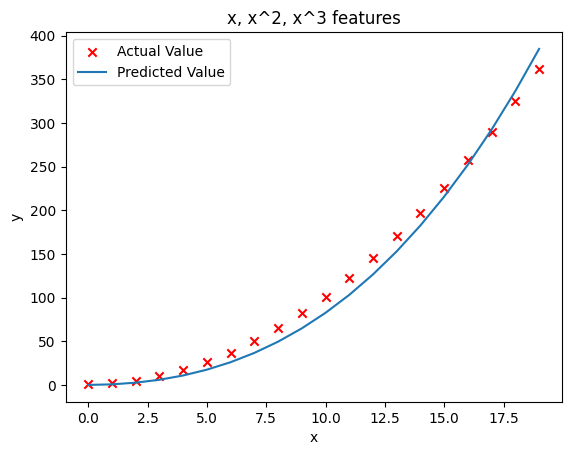

In [3]:
X = np.c_[x, x**2, x**3]   #c_ is contatenation row wise
# X===[ [x1 x2 x3] [x1 x2 x3] ... ]
model_w,model_b = run_gradient_descent(X, y, iterations=10000, alpha=1e-7)
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("x, x^2, x^3 features")
plt.plot(x, np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Note the value of $\mathbf{w}$, `[0.08 0.54 0.03]` and b is `0.0106`.This implies the model after fitting/training is:
$$ 0.08x + 0.54x^2 + 0.03x^3 + 0.0106 $$
1* Gradient descent has emphasized the data that is the best fit to the $x^2$ data by increasing the $w_1$ term relative to the others.  If you were to run for a very long time, it would continue to reduce the impact of the other terms.*
>Gradient descent is picking the 'correct' features for us by emphasizing its associated parameter

### An Alternate View
Since we are using lr, if we think about individual features, the features that matches the most with y will have a more of a straight line relation with y compared to the ones that dont

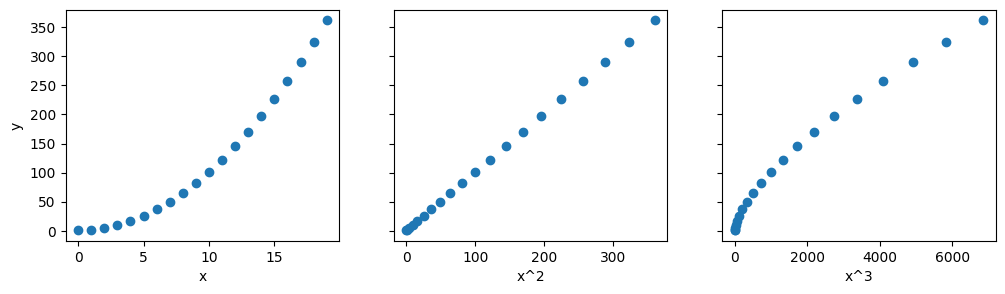

In [3]:
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

Above, it is clear that the $x^2$ feature mapped against the target value $y$ is linear. Linear regression can then easily generate a model using that feature.

### Scaling features

Squaring and cubing change the scales of the data compared to initial x.
so we scale them. Lets try z-scaling here

In [4]:
X = np.c_[x, x**2, x**3]
#ptp displays differnece between highest and lowest values
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")
# this high-low before vs after shows the impact of normalisation

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.29501788 3.18076489 3.28307153]


Now we can try again with a more aggressive value of alpha(since features are normalised steps will be more accurate and straightforward so we can take larger values of alpha to finish work faster):

w,b found by gradient descent: w: [5.26616827e-05 1.13494579e+02 8.43238778e-05], b: 123.50


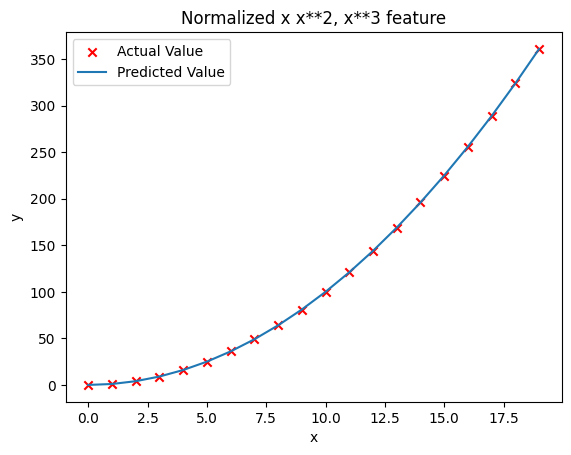

In [6]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X) 

model_w, model_b = run_gradient_descent(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Feature scaling allows this to converge much faster.   
Note again the values of $\mathbf{w}$. The $w_1$ term, which is the $x^2$ term is the most emphasized.

### Complex Functions
With feature engineering, even quite complex functions can be modeled:

w,b found by gradient descent: w: [ -1.33565562 -10.00231728  24.77799625   5.96170981 -12.48587921
 -16.26275994  -9.50807133   0.59194813   8.70295901  11.9412625
   9.27097351   0.78896901 -12.81745188], b: -0.01


ValueError: shapes (20,3) and (13,) not aligned: 3 (dim 1) != 13 (dim 0)

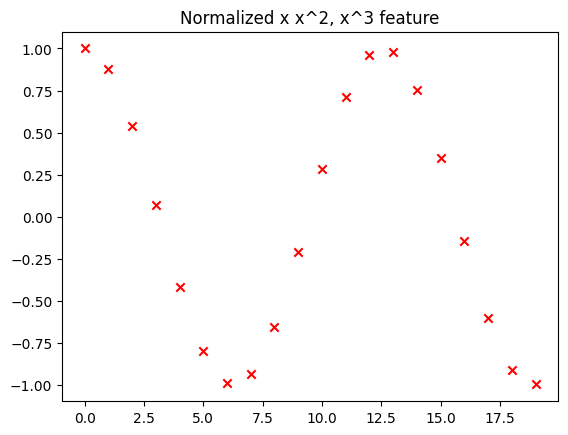

In [7]:
u = np.arange(0,20,1)
v = np.cos(x/2)

U = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
U = zscore_normalize_features(U) 

model_w,model_b = run_gradient_descent(U, v, iterations=1000000, alpha = 1e-1)

plt.scatter(u, v, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x^2, x^3 feature")
plt.plot(u,np.dot(X,model_w) + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()
